# Imports and utility functions

In [1]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pylab
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

In [2]:
def import_dataset():
    uploaded = files.upload()

    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

    with open(fn, 'r') as opened_file:
        txt_lines = opened_file.readlines()

    sequences = []
    label_array = np.zeros(len(txt_lines))
    for i in range (len(txt_lines)):
        line_elements = txt_lines[i].split('\t')
        label_array[i] = int(line_elements[0])
        seq = list(line_elements[1][:-1])
        sequences.append(seq)

    raw_dataset = pd.DataFrame(data=sequences, columns=range(1,201))
    raw_dataset['label'] = label_array
    return raw_dataset

# SRSF1

## ENCSR432XUP

### Import Dataset and fit model

In [3]:
SRSF1_ENCSR432XUP_ds = import_dataset()
[SRSF1_ENCSR432XUP_train, SRSF1_ENCSR432XUP_test] = train_test_split(SRSF1_ENCSR432XUP_ds,train_size=0.8, random_state=103)

# One-Hot Encoding
SRSF1_ENCSR432XUP_train_features = pd.get_dummies(SRSF1_ENCSR432XUP_train.iloc[:, 0:200]).to_numpy()
SRSF1_ENCSR432XUP_train_labels = SRSF1_ENCSR432XUP_train['label'].to_numpy()

SRSF1_ENCSR432XUP_test_features = pd.get_dummies(SRSF1_ENCSR432XUP_test.iloc[:, 0:200]).to_numpy()
SRSF1_ENCSR432XUP_test_labels = SRSF1_ENCSR432XUP_test['label'].to_numpy()

# C=1e-3 worked best
SRSF1_ENCSR432XUP_model = svm.SVC(C=1e-3, kernel="linear")
SRSF1_ENCSR432XUP_model = SRSF1_ENCSR432XUP_model.fit(SRSF1_ENCSR432XUP_train_features, SRSF1_ENCSR432XUP_train_labels)

Saving SRSF1_ENCSR432XUP_dataset.txt to SRSF1_ENCSR432XUP_dataset.txt
User uploaded file "SRSF1_ENCSR432XUP_dataset.txt" with length 816000 bytes


In [4]:
SRSF1_ENCSR432XUP_ds_all_upper = import_dataset()
[SRSF1_ENCSR432XUP_train_all_upper, SRSF1_ENCSR432XUP_test_all_upper] = train_test_split(SRSF1_ENCSR432XUP_ds_all_upper,train_size=0.8, random_state=103)

# One-Hot Encoding
SRSF1_ENCSR432XUP_train_features_all_upper = pd.get_dummies(SRSF1_ENCSR432XUP_train_all_upper.iloc[:, 0:200]).to_numpy()
SRSF1_ENCSR432XUP_train_labels_all_upper = SRSF1_ENCSR432XUP_train_all_upper['label'].to_numpy()

SRSF1_ENCSR432XUP_test_features_all_upper = pd.get_dummies(SRSF1_ENCSR432XUP_test_all_upper.iloc[:, 0:200]).to_numpy()
SRSF1_ENCSR432XUP_test_labels_all_upper = SRSF1_ENCSR432XUP_test_all_upper['label'].to_numpy()

# C=1e-3 worked best
SRSF1_ENCSR432XUP_model_all_upper = svm.SVC(C=1e-3, kernel="linear")
SRSF1_ENCSR432XUP_model_all_upper = SRSF1_ENCSR432XUP_model_all_upper.fit(SRSF1_ENCSR432XUP_train_features_all_upper, SRSF1_ENCSR432XUP_train_labels_all_upper)

Saving SRSF1_ENCSR432XUP_dataset_all_uppercase.txt to SRSF1_ENCSR432XUP_dataset_all_uppercase.txt
User uploaded file "SRSF1_ENCSR432XUP_dataset_all_uppercase.txt" with length 816000 bytes


In [5]:
SRSF1_ENCSR432XUP_ds_all_x = import_dataset()
[SRSF1_ENCSR432XUP_train_all_x, SRSF1_ENCSR432XUP_test_all_x] = train_test_split(SRSF1_ENCSR432XUP_ds_all_x,train_size=0.8, random_state=103)

# One-Hot Encoding
SRSF1_ENCSR432XUP_train_features_all_x = pd.get_dummies(SRSF1_ENCSR432XUP_train_all_x.iloc[:, 0:200]).to_numpy()
SRSF1_ENCSR432XUP_train_labels_all_x = SRSF1_ENCSR432XUP_train_all_x['label'].to_numpy()

SRSF1_ENCSR432XUP_test_features_all_x = pd.get_dummies(SRSF1_ENCSR432XUP_test_all_x.iloc[:, 0:200]).to_numpy()
SRSF1_ENCSR432XUP_test_labels_all_x = SRSF1_ENCSR432XUP_test_all_x['label'].to_numpy()

# C=1e-3 worked best
SRSF1_ENCSR432XUP_model_all_x = svm.SVC(C=1e-3, kernel="linear")
SRSF1_ENCSR432XUP_model_all_x = SRSF1_ENCSR432XUP_model_all_x.fit(SRSF1_ENCSR432XUP_train_features_all_x, SRSF1_ENCSR432XUP_train_labels_all_x)

Saving SRSF1_ENCSR432XUP_dataset_classify_uppercase_lowercase.txt to SRSF1_ENCSR432XUP_dataset_classify_uppercase_lowercase.txt
User uploaded file "SRSF1_ENCSR432XUP_dataset_classify_uppercase_lowercase.txt" with length 816000 bytes


### Display results

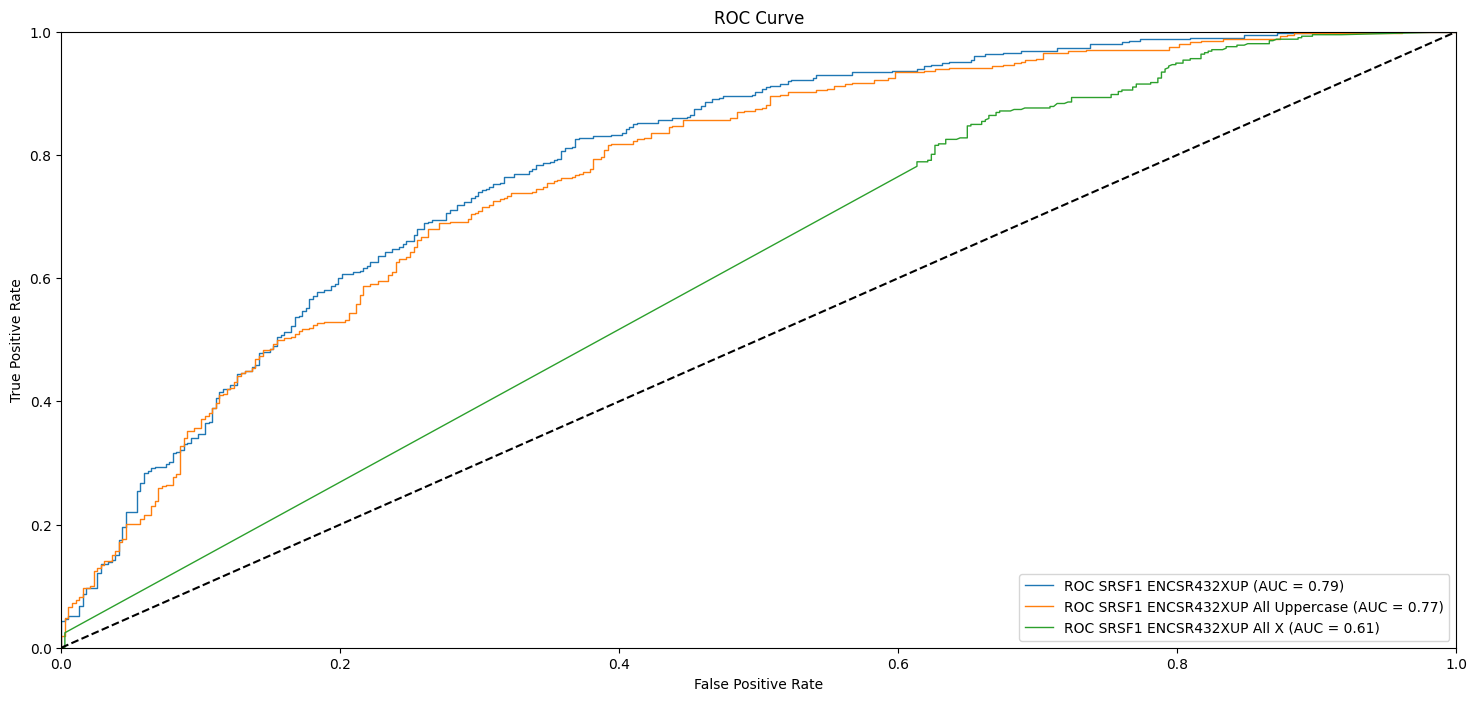

In [6]:
fig, ax = plt.subplots(figsize=(18, 8))

viz = RocCurveDisplay.from_estimator(
    SRSF1_ENCSR432XUP_model,
    SRSF1_ENCSR432XUP_test_features,
    SRSF1_ENCSR432XUP_test_labels,
    name=f"ROC SRSF1 ENCSR432XUP",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    SRSF1_ENCSR432XUP_model_all_upper,
    SRSF1_ENCSR432XUP_test_features_all_upper,
    SRSF1_ENCSR432XUP_test_labels_all_upper,
    name=f"ROC SRSF1 ENCSR432XUP All Uppercase",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    SRSF1_ENCSR432XUP_model_all_x,
    SRSF1_ENCSR432XUP_test_features_all_x,
    SRSF1_ENCSR432XUP_test_labels_all_x,
    name=f"ROC SRSF1 ENCSR432XUP All X",
    lw=1,
    ax=ax
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ROC Curve",
)

ax.legend(loc="lower right")
ax.plot(np.linspace(0,1,10), np.linspace(0,1,10), '--',color='black')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

### Display trained weights

In [9]:
SRSF1_ENCSR432XUP_weights = SRSF1_ENCSR432XUP_model.coef_[0]
SRSF1_ENCSR432XUP_A_weights = SRSF1_ENCSR432XUP_weights[::4]
SRSF1_ENCSR432XUP_C_weights = SRSF1_ENCSR432XUP_weights[1::4]
SRSF1_ENCSR432XUP_G_weights = SRSF1_ENCSR432XUP_weights[2::4]
SRSF1_ENCSR432XUP_T_weights = SRSF1_ENCSR432XUP_weights[3::4]

SRSF1_ENCSR432XUP_avg_weights = SRSF1_ENCSR432XUP_weights.reshape(-1, 4).mean(axis=1)

print('Average weights mean is ', SRSF1_ENCSR432XUP_avg_weights.mean())
print('Average weights variance is ', SRSF1_ENCSR432XUP_avg_weights.var())

Average weights mean is  3.94248435980904e-17
Average weights variance is  4.328404487506725e-34


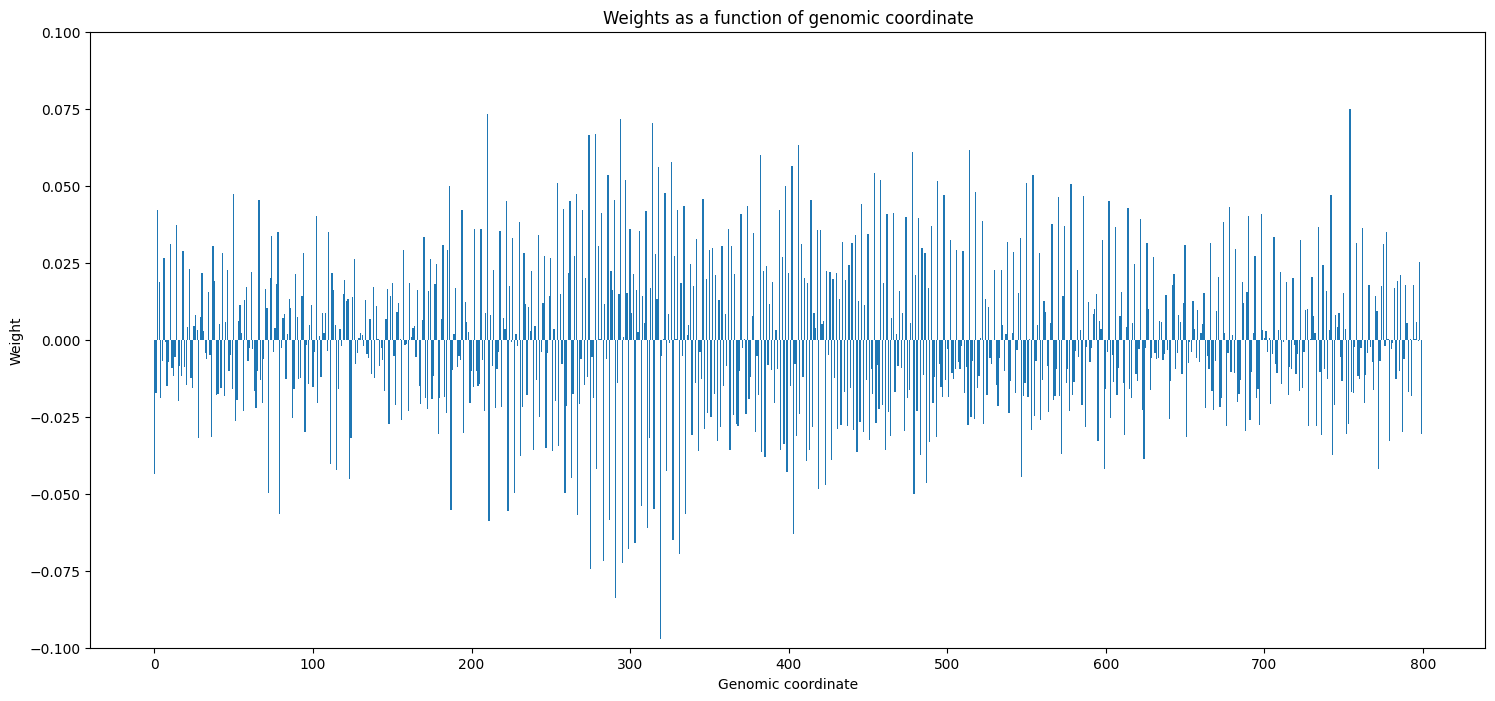

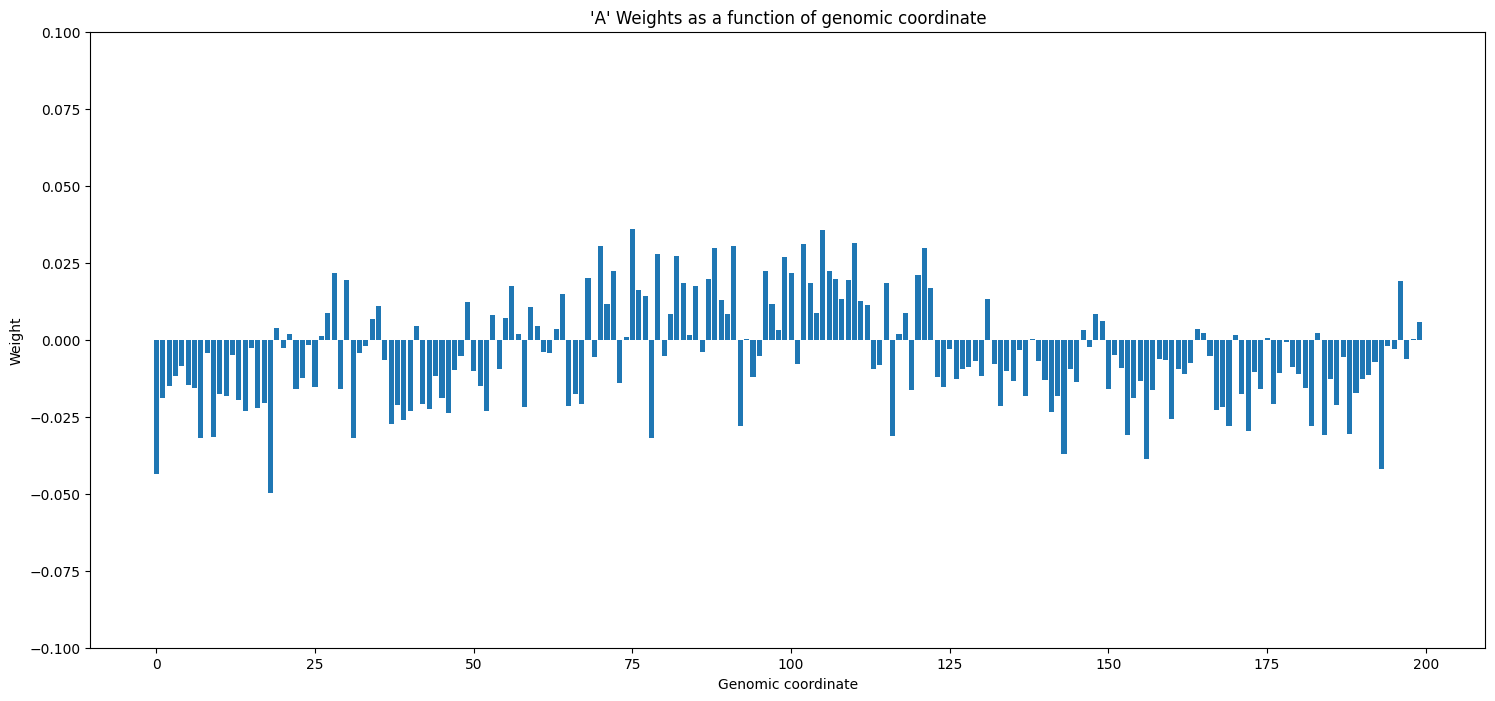

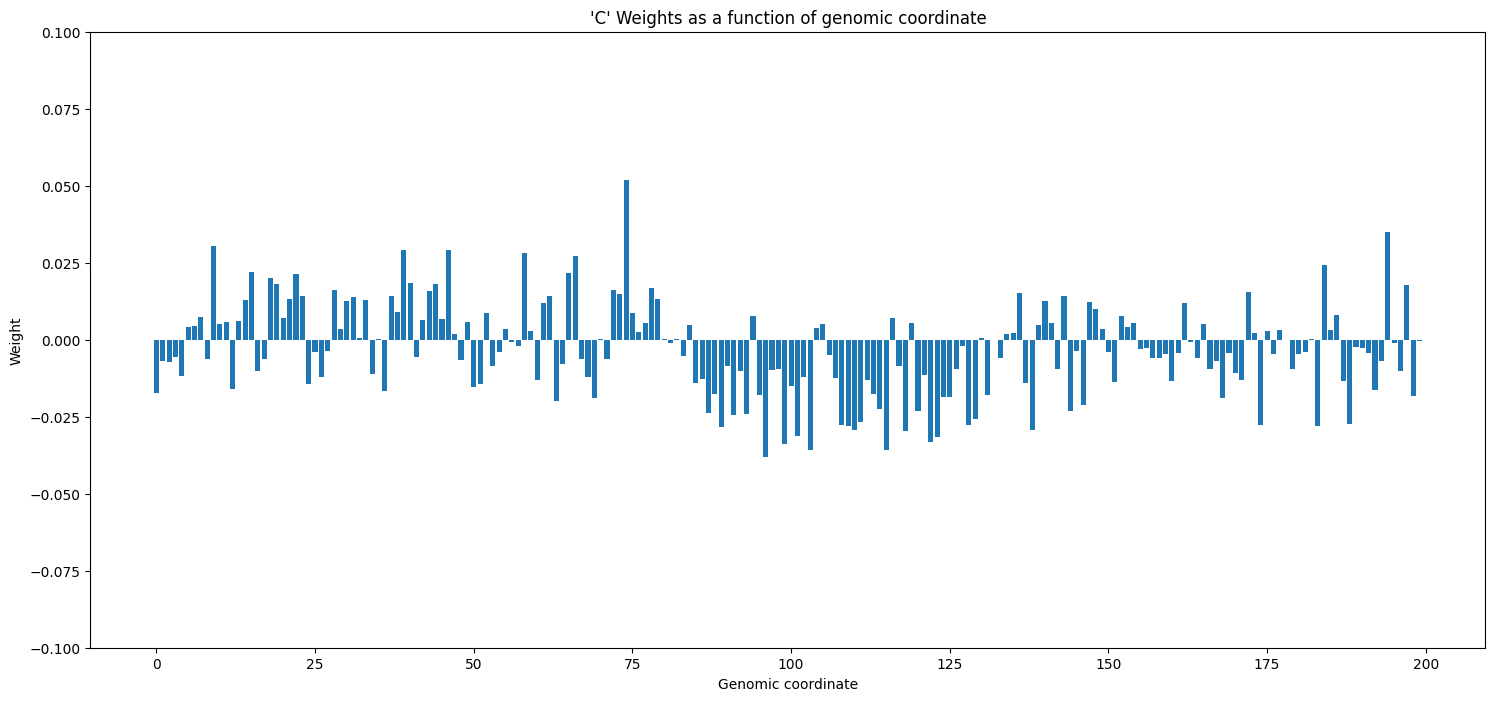

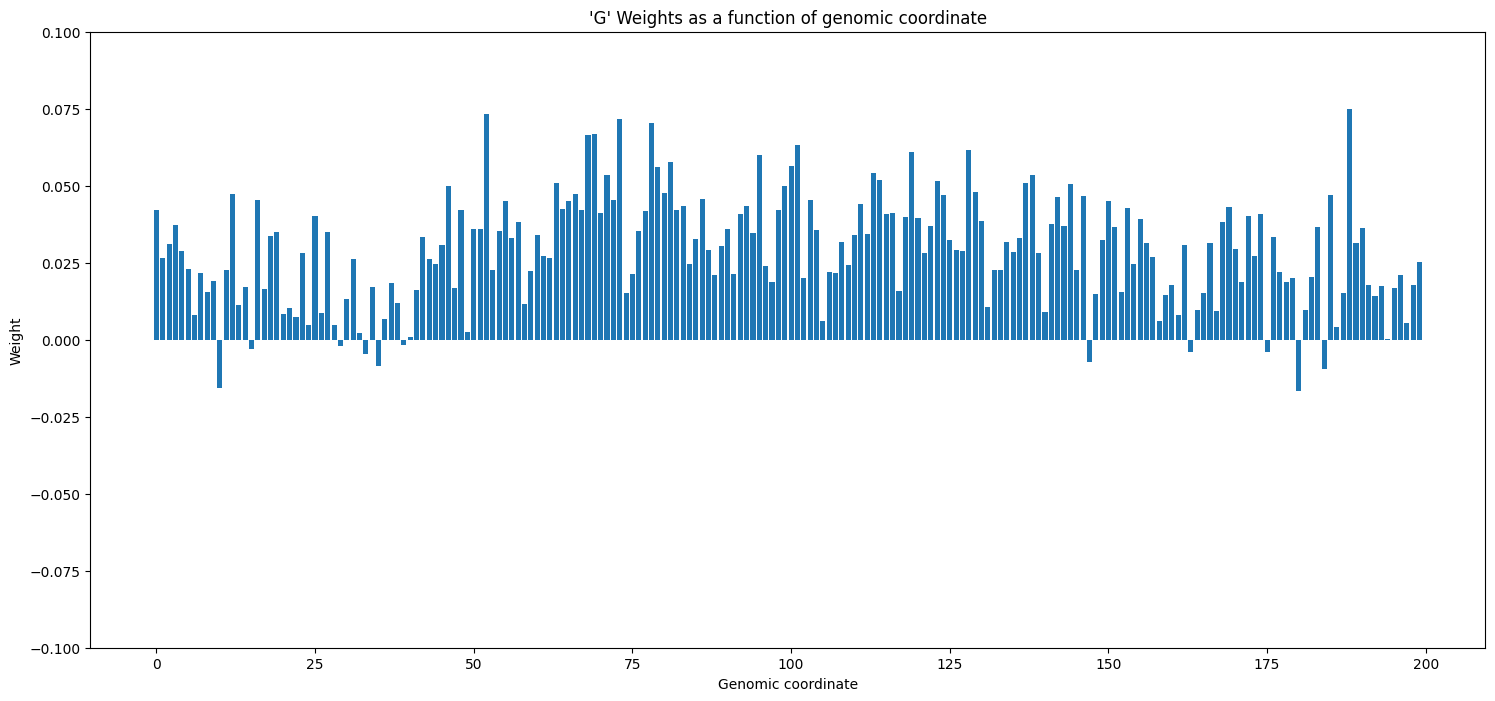

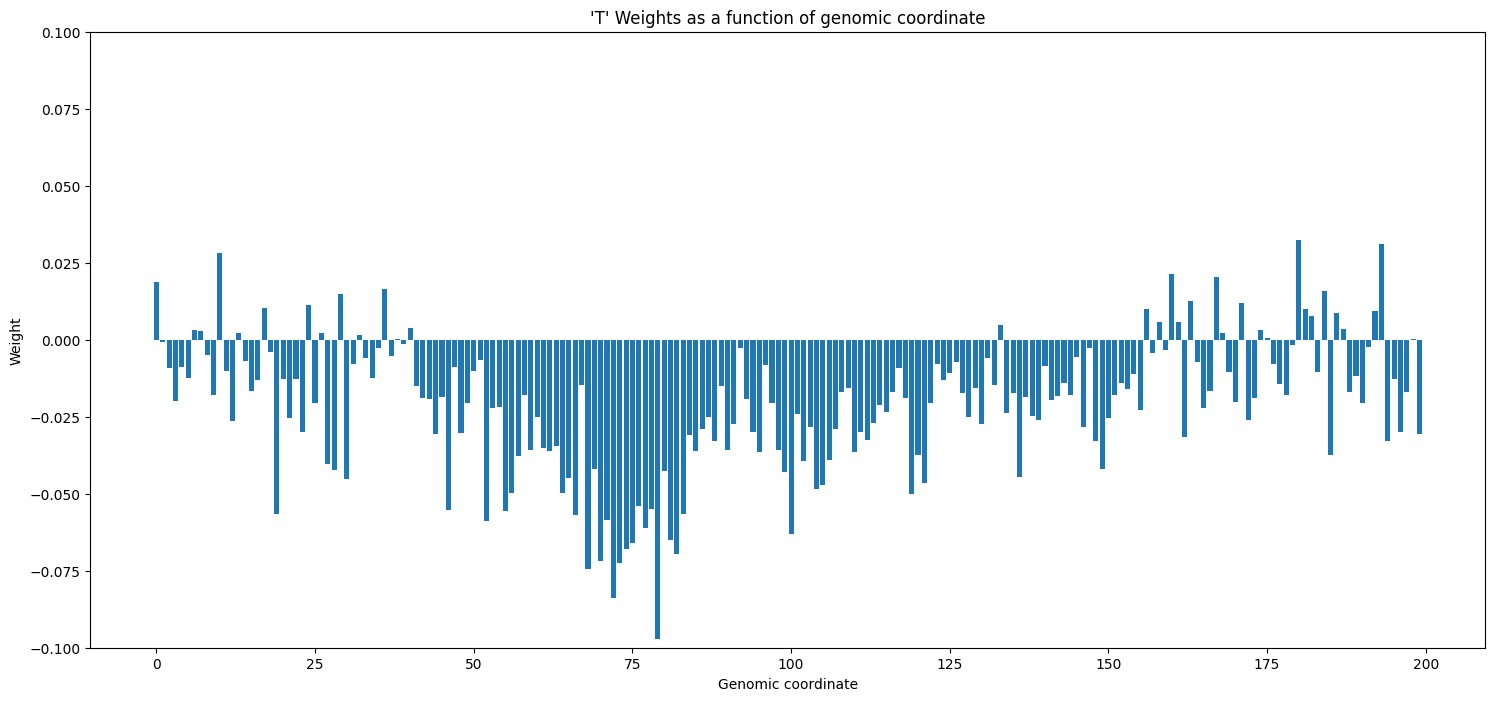

In [10]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_weights)), SRSF1_ENCSR432XUP_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_A_weights)), SRSF1_ENCSR432XUP_A_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'A' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_C_weights)), SRSF1_ENCSR432XUP_C_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'C' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_G_weights)), SRSF1_ENCSR432XUP_G_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'G' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_T_weights)), SRSF1_ENCSR432XUP_T_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("'T' Weights as a function of genomic coordinate")
plt.ylim([-0.1, 0.1])
plt.show()

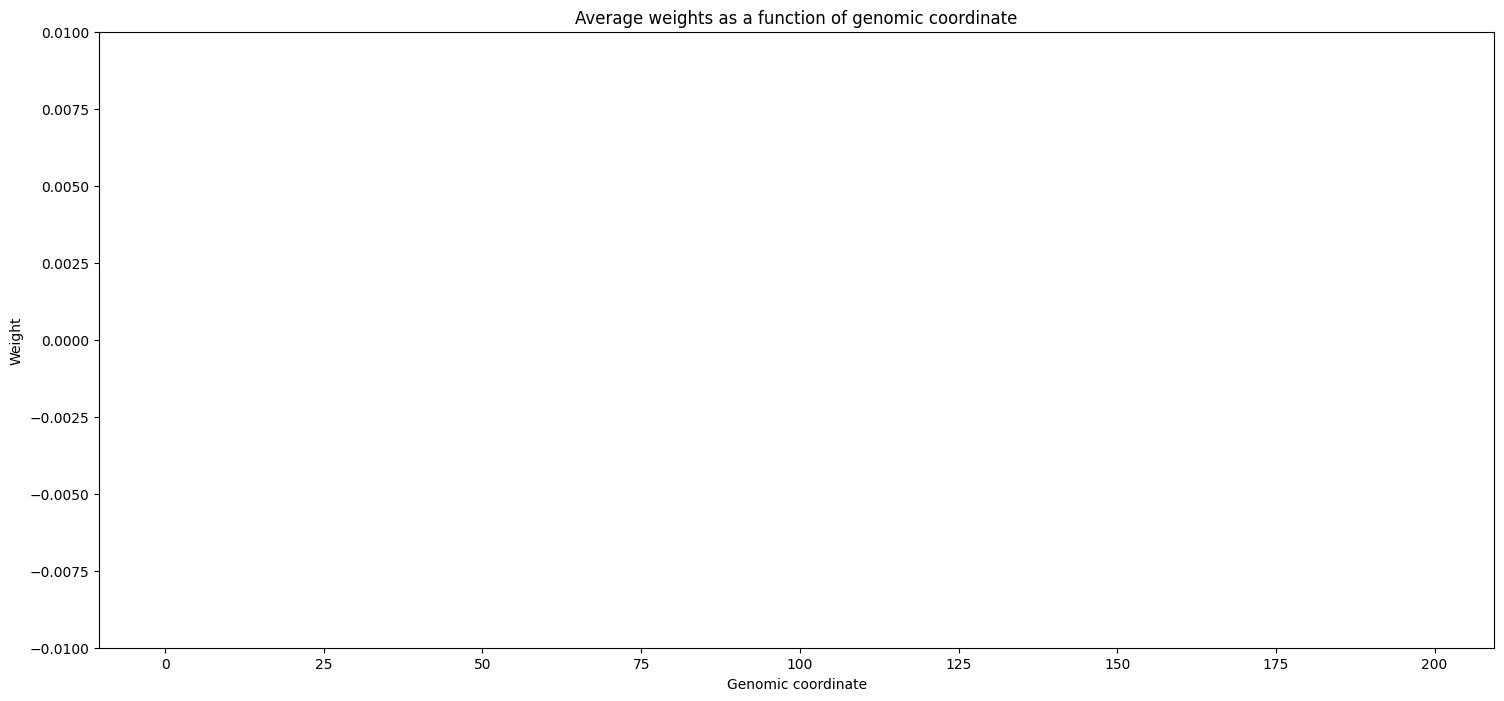

In [11]:
plt.figure(figsize=(18, 8))
plt.bar(range(len(SRSF1_ENCSR432XUP_avg_weights)), SRSF1_ENCSR432XUP_avg_weights)
plt.xlabel('Genomic coordinate')
plt.ylabel('Weight')
plt.title("Average weights as a function of genomic coordinate")
plt.ylim([-0.01, 0.01])
plt.show()

## ENCSR321PWZ

### Import Dataset and fit model

In [7]:
SRSF1_ENCSR321PWZ_ds = import_dataset()
[SRSF1_ENCSR321PWZ_train, SRSF1_ENCSR321PWZ_test] = train_test_split(SRSF1_ENCSR321PWZ_ds,train_size=0.8, random_state=103)

# One-Hot Encoding
SRSF1_ENCSR321PWZ_train_features = pd.get_dummies(SRSF1_ENCSR321PWZ_train.iloc[:, 0:200]).to_numpy()
SRSF1_ENCSR321PWZ_train_labels = SRSF1_ENCSR321PWZ_train['label'].to_numpy()

SRSF1_ENCSR321PWZ_test_features = pd.get_dummies(SRSF1_ENCSR321PWZ_test.iloc[:, 0:200]).to_numpy()
SRSF1_ENCSR321PWZ_test_labels = SRSF1_ENCSR321PWZ_test['label'].to_numpy()

# C=1e-3 worked best
SRSF1_ENCSR321PWZ_model = svm.SVC(C=1e-3, kernel="linear")
SRSF1_ENCSR321PWZ_model = SRSF1_ENCSR321PWZ_model.fit(SRSF1_ENCSR321PWZ_train_features, SRSF1_ENCSR321PWZ_train_labels)

Saving SRSF1_ENCSR321PWZ_dataset.txt to SRSF1_ENCSR321PWZ_dataset.txt
User uploaded file "SRSF1_ENCSR321PWZ_dataset.txt" with length 816000 bytes


In [8]:
SRSF1_ENCSR321PWZ_ds_all_upper = import_dataset()
[SRSF1_ENCSR321PWZ_train_all_upper, SRSF1_ENCSR321PWZ_test_all_upper] = train_test_split(SRSF1_ENCSR321PWZ_ds_all_upper,train_size=0.8, random_state=103)

# One-Hot Encoding
SRSF1_ENCSR321PWZ_train_features_all_upper = pd.get_dummies(SRSF1_ENCSR321PWZ_train_all_upper.iloc[:, 0:200]).to_numpy()
SRSF1_ENCSR321PWZ_train_labels_all_upper = SRSF1_ENCSR321PWZ_train_all_upper['label'].to_numpy()

SRSF1_ENCSR321PWZ_test_features_all_upper = pd.get_dummies(SRSF1_ENCSR321PWZ_test_all_upper.iloc[:, 0:200]).to_numpy()
SRSF1_ENCSR321PWZ_test_labels_all_upper = SRSF1_ENCSR321PWZ_test_all_upper['label'].to_numpy()

# C=1e-3 worked best
SRSF1_ENCSR321PWZ_model_all_upper = svm.SVC(C=1e-3, kernel="linear")
SRSF1_ENCSR321PWZ_model_all_upper = SRSF1_ENCSR321PWZ_model_all_upper.fit(SRSF1_ENCSR321PWZ_train_features_all_upper, SRSF1_ENCSR321PWZ_train_labels_all_upper)

Saving SRSF1_ENCSR321PWZ_dataset_all_uppercase.txt to SRSF1_ENCSR321PWZ_dataset_all_uppercase.txt
User uploaded file "SRSF1_ENCSR321PWZ_dataset_all_uppercase.txt" with length 816000 bytes


In [9]:
SRSF1_ENCSR321PWZ_ds_all_x = import_dataset()
[SRSF1_ENCSR321PWZ_train_all_x, SRSF1_ENCSR321PWZ_test_all_x] = train_test_split(SRSF1_ENCSR321PWZ_ds_all_x,train_size=0.8, random_state=103)

# One-Hot Encoding
SRSF1_ENCSR321PWZ_train_features_all_x = pd.get_dummies(SRSF1_ENCSR321PWZ_train_all_x.iloc[:, 0:200]).to_numpy()
SRSF1_ENCSR321PWZ_train_labels_all_x = SRSF1_ENCSR321PWZ_train_all_x['label'].to_numpy()

SRSF1_ENCSR321PWZ_test_features_all_x = pd.get_dummies(SRSF1_ENCSR321PWZ_test_all_x.iloc[:, 0:200]).to_numpy()
SRSF1_ENCSR321PWZ_test_labels_all_x = SRSF1_ENCSR321PWZ_test_all_x['label'].to_numpy()

# C=1e-3 worked best
SRSF1_ENCSR321PWZ_model_all_x = svm.SVC(C=1e-3, kernel="linear")
SRSF1_ENCSR321PWZ_model_all_x = SRSF1_ENCSR321PWZ_model_all_x.fit(SRSF1_ENCSR321PWZ_train_features_all_x, SRSF1_ENCSR321PWZ_train_labels_all_x)

Saving SRSF1_ENCSR321PWZ_dataset_classify_uppercase_lowercase.txt to SRSF1_ENCSR321PWZ_dataset_classify_uppercase_lowercase.txt
User uploaded file "SRSF1_ENCSR321PWZ_dataset_classify_uppercase_lowercase.txt" with length 816000 bytes


### Display results

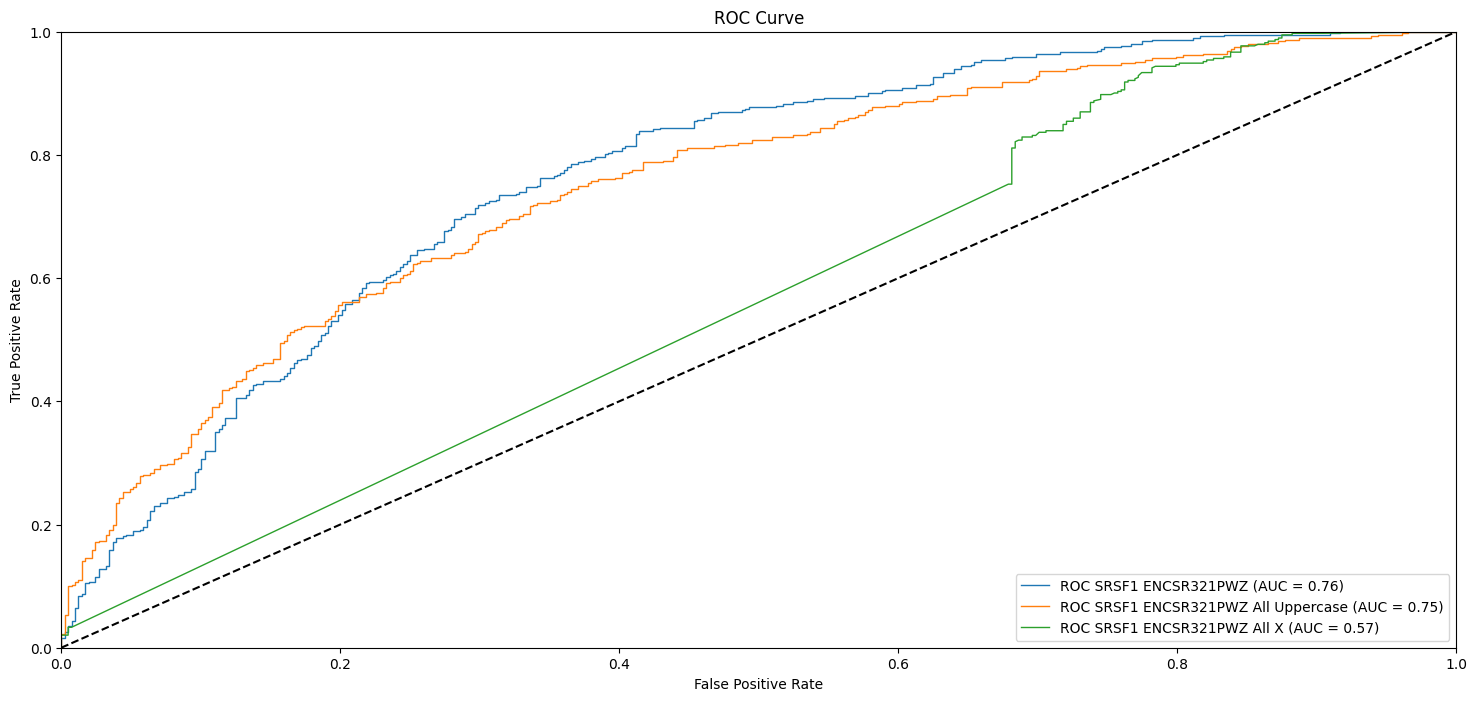

In [36]:
fig, ax = plt.subplots(figsize=(18, 8))

viz = RocCurveDisplay.from_estimator(
    SRSF1_ENCSR321PWZ_model,
    SRSF1_ENCSR321PWZ_test_features,
    SRSF1_ENCSR321PWZ_test_labels,
    name=f"ROC SRSF1 ENCSR321PWZ",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    SRSF1_ENCSR321PWZ_model_all_upper,
    SRSF1_ENCSR321PWZ_test_features_all_upper,
    SRSF1_ENCSR321PWZ_test_labels_all_upper,
    name=f"ROC SRSF1 ENCSR321PWZ All Uppercase",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    SRSF1_ENCSR321PWZ_model_all_x,
    SRSF1_ENCSR321PWZ_test_features_all_x,
    SRSF1_ENCSR321PWZ_test_labels_all_x,
    name=f"ROC SRSF1 ENCSR321PWZ All X",
    lw=1,
    ax=ax
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ROC Curve",
)

ax.legend(loc="lower right")
ax.plot(np.linspace(0,1,10), np.linspace(0,1,10), '--',color='black')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

# PUM2

## ENCSR661ICQ

### Import Dataset and fit model

In [12]:
PUM2_ENCSR661ICQ_ds = import_dataset()
[PUM2_ENCSR661ICQ_train, PUM2_ENCSR661ICQ_test] = train_test_split(PUM2_ENCSR661ICQ_ds,train_size=0.8, random_state=103)

# One-Hot Encoding
PUM2_ENCSR661ICQ_train_features = pd.get_dummies(PUM2_ENCSR661ICQ_train.iloc[:, 0:200]).to_numpy()
PUM2_ENCSR661ICQ_train_labels = PUM2_ENCSR661ICQ_train['label'].to_numpy()

PUM2_ENCSR661ICQ_test_features = pd.get_dummies(PUM2_ENCSR661ICQ_test.iloc[:, 0:200]).to_numpy()
PUM2_ENCSR661ICQ_test_labels = PUM2_ENCSR661ICQ_test['label'].to_numpy()

# C=1e-3 worked best
PUM2_ENCSR661ICQ_model = svm.SVC(C=1e-3, kernel="linear")
PUM2_ENCSR661ICQ_model = PUM2_ENCSR661ICQ_model.fit(PUM2_ENCSR661ICQ_train_features, PUM2_ENCSR661ICQ_train_labels)

Saving PUM2_ENCSR661ICQ_dataset.txt to PUM2_ENCSR661ICQ_dataset (2).txt
User uploaded file "PUM2_ENCSR661ICQ_dataset (2).txt" with length 816000 bytes


In [13]:
PUM2_ENCSR661ICQ_ds_all_upper = import_dataset()
[PUM2_ENCSR661ICQ_train_all_upper, PUM2_ENCSR661ICQ_test_all_upper] = train_test_split(PUM2_ENCSR661ICQ_ds_all_upper,train_size=0.8, random_state=103)

# One-Hot Encoding
PUM2_ENCSR661ICQ_train_features_all_upper = pd.get_dummies(PUM2_ENCSR661ICQ_train_all_upper.iloc[:, 0:200]).to_numpy()
PUM2_ENCSR661ICQ_train_labels_all_upper = PUM2_ENCSR661ICQ_train_all_upper['label'].to_numpy()

PUM2_ENCSR661ICQ_test_features_all_upper = pd.get_dummies(PUM2_ENCSR661ICQ_test_all_upper.iloc[:, 0:200]).to_numpy()
PUM2_ENCSR661ICQ_test_labels_all_upper = PUM2_ENCSR661ICQ_test_all_upper['label'].to_numpy()

# C=1e-3 worked best
PUM2_ENCSR661ICQ_model_all_upper = svm.SVC(C=1e-3, kernel="linear")
PUM2_ENCSR661ICQ_model_all_upper = PUM2_ENCSR661ICQ_model_all_upper.fit(PUM2_ENCSR661ICQ_train_features_all_upper, PUM2_ENCSR661ICQ_train_labels_all_upper)

Saving PUM2_ENCSR661ICQ_dataset_all_uppercase.txt to PUM2_ENCSR661ICQ_dataset_all_uppercase.txt
User uploaded file "PUM2_ENCSR661ICQ_dataset_all_uppercase.txt" with length 816000 bytes


In [14]:
PUM2_ENCSR661ICQ_ds_all_x = import_dataset()
[PUM2_ENCSR661ICQ_train_all_x, PUM2_ENCSR661ICQ_test_all_x] = train_test_split(PUM2_ENCSR661ICQ_ds_all_x,train_size=0.8, random_state=103)

# One-Hot Encoding
PUM2_ENCSR661ICQ_train_features_all_x = pd.get_dummies(PUM2_ENCSR661ICQ_train_all_x.iloc[:, 0:200]).to_numpy()
PUM2_ENCSR661ICQ_train_labels_all_x = PUM2_ENCSR661ICQ_train_all_x['label'].to_numpy()

PUM2_ENCSR661ICQ_test_features_all_x = pd.get_dummies(PUM2_ENCSR661ICQ_test_all_x.iloc[:, 0:200]).to_numpy()
PUM2_ENCSR661ICQ_test_labels_all_x = PUM2_ENCSR661ICQ_test_all_x['label'].to_numpy()

# C=1e-3 worked best
PUM2_ENCSR661ICQ_model_all_x = svm.SVC(C=1e-3, kernel="linear")
PUM2_ENCSR661ICQ_model_all_x = PUM2_ENCSR661ICQ_model_all_x.fit(PUM2_ENCSR661ICQ_train_features_all_x, PUM2_ENCSR661ICQ_train_labels_all_x)

Saving PUM2_ENCSR661ICQ_dataset_classify_uppercase_lowercase.txt to PUM2_ENCSR661ICQ_dataset_classify_uppercase_lowercase.txt
User uploaded file "PUM2_ENCSR661ICQ_dataset_classify_uppercase_lowercase.txt" with length 816000 bytes


### Display results

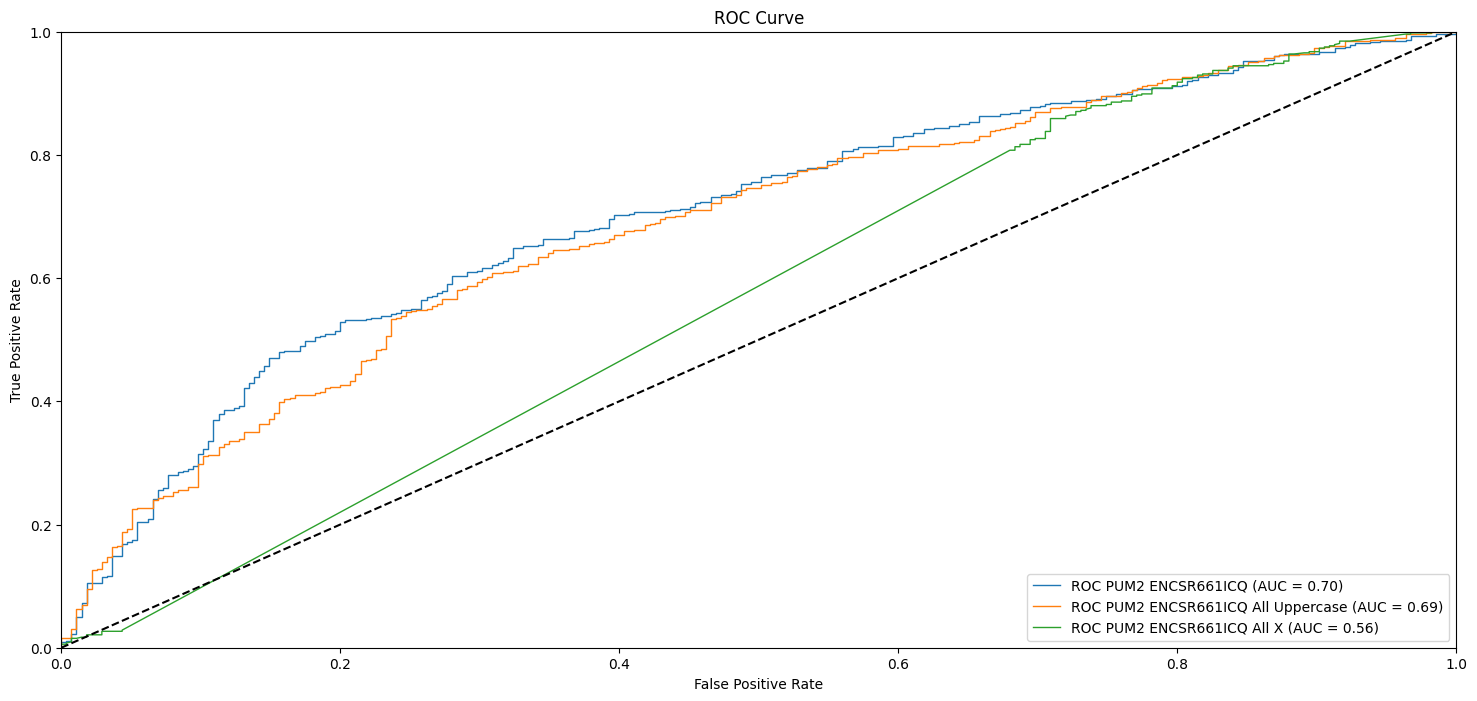

In [37]:
fig, ax = plt.subplots(figsize=(18, 8))

viz = RocCurveDisplay.from_estimator(
    PUM2_ENCSR661ICQ_model,
    PUM2_ENCSR661ICQ_test_features,
    PUM2_ENCSR661ICQ_test_labels,
    name=f"ROC PUM2 ENCSR661ICQ",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    PUM2_ENCSR661ICQ_model_all_upper,
    PUM2_ENCSR661ICQ_test_features_all_upper,
    PUM2_ENCSR661ICQ_test_labels_all_upper,
    name=f"ROC PUM2 ENCSR661ICQ All Uppercase",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    PUM2_ENCSR661ICQ_model_all_x,
    PUM2_ENCSR661ICQ_test_features_all_x,
    PUM2_ENCSR661ICQ_test_labels_all_x,
    name=f"ROC PUM2 ENCSR661ICQ All X",
    lw=1,
    ax=ax
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ROC Curve",
)

ax.legend(loc="lower right")
ax.plot(np.linspace(0,1,10), np.linspace(0,1,10), '--',color='black')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

# QKI

## ENCSR366YOG

### Import Dataset and fit model

In [20]:
QKI_ENCSR366YOG_ds = import_dataset()
[QKI_ENCSR366YOG_train, QKI_ENCSR366YOG_test] = train_test_split(QKI_ENCSR366YOG_ds,train_size=0.8, random_state=103)

# One-Hot Encoding
QKI_ENCSR366YOG_train_features = pd.get_dummies(QKI_ENCSR366YOG_train.iloc[:, 0:200]).to_numpy()
QKI_ENCSR366YOG_train_labels = QKI_ENCSR366YOG_train['label'].to_numpy()

QKI_ENCSR366YOG_test_features = pd.get_dummies(QKI_ENCSR366YOG_test.iloc[:, 0:200]).to_numpy()
QKI_ENCSR366YOG_test_labels = QKI_ENCSR366YOG_test['label'].to_numpy()

# C=1e-3 worked best
QKI_ENCSR366YOG_model = svm.SVC(C=1e-3, kernel="linear")
QKI_ENCSR366YOG_model = QKI_ENCSR366YOG_model.fit(QKI_ENCSR366YOG_train_features, QKI_ENCSR366YOG_train_labels)

Saving QKI_ENCSR366YOG_dataset.txt to QKI_ENCSR366YOG_dataset (1).txt
User uploaded file "QKI_ENCSR366YOG_dataset (1).txt" with length 816000 bytes


In [17]:
QKI_ENCSR366YOG_ds_all_upper = import_dataset()
[QKI_ENCSR366YOG_train_all_upper, QKI_ENCSR366YOG_test_all_upper] = train_test_split(QKI_ENCSR366YOG_ds_all_upper,train_size=0.8, random_state=103)

# One-Hot Encoding
QKI_ENCSR366YOG_train_features_all_upper = pd.get_dummies(QKI_ENCSR366YOG_train_all_upper.iloc[:, 0:200]).to_numpy()
QKI_ENCSR366YOG_train_labels_all_upper = QKI_ENCSR366YOG_train_all_upper['label'].to_numpy()

QKI_ENCSR366YOG_test_features_all_upper = pd.get_dummies(QKI_ENCSR366YOG_test_all_upper.iloc[:, 0:200]).to_numpy()
QKI_ENCSR366YOG_test_labels_all_upper = QKI_ENCSR366YOG_test_all_upper['label'].to_numpy()

# C=1e-3 worked best
QKI_ENCSR366YOG_model_all_upper = svm.SVC(C=1e-3, kernel="linear")
QKI_ENCSR366YOG_model_all_upper = QKI_ENCSR366YOG_model_all_upper.fit(QKI_ENCSR366YOG_train_features_all_upper, QKI_ENCSR366YOG_train_labels_all_upper)

Saving QKI_ENCSR366YOG_dataset_all_uppercase.txt to QKI_ENCSR366YOG_dataset_all_uppercase.txt
User uploaded file "QKI_ENCSR366YOG_dataset_all_uppercase.txt" with length 816000 bytes


In [18]:
QKI_ENCSR366YOG_ds_all_x = import_dataset()
[QKI_ENCSR366YOG_train_all_x, QKI_ENCSR366YOG_test_all_x] = train_test_split(QKI_ENCSR366YOG_ds_all_x,train_size=0.8, random_state=103)

# One-Hot Encoding
QKI_ENCSR366YOG_train_features_all_x = pd.get_dummies(QKI_ENCSR366YOG_train_all_x.iloc[:, 0:200]).to_numpy()
QKI_ENCSR366YOG_train_labels_all_x = QKI_ENCSR366YOG_train_all_x['label'].to_numpy()

QKI_ENCSR366YOG_test_features_all_x = pd.get_dummies(QKI_ENCSR366YOG_test_all_x.iloc[:, 0:200]).to_numpy()
QKI_ENCSR366YOG_test_labels_all_x = QKI_ENCSR366YOG_test_all_x['label'].to_numpy()

# C=1e-3 worked best
QKI_ENCSR366YOG_model_all_x = svm.SVC(C=1e-3, kernel="linear")
QKI_ENCSR366YOG_model_all_x = QKI_ENCSR366YOG_model_all_x.fit(QKI_ENCSR366YOG_train_features_all_x, QKI_ENCSR366YOG_train_labels_all_x)

Saving QKI_ENCSR366YOG_dataset_classify_uppercase_lowercase.txt to QKI_ENCSR366YOG_dataset_classify_uppercase_lowercase.txt
User uploaded file "QKI_ENCSR366YOG_dataset_classify_uppercase_lowercase.txt" with length 816000 bytes


### Display results

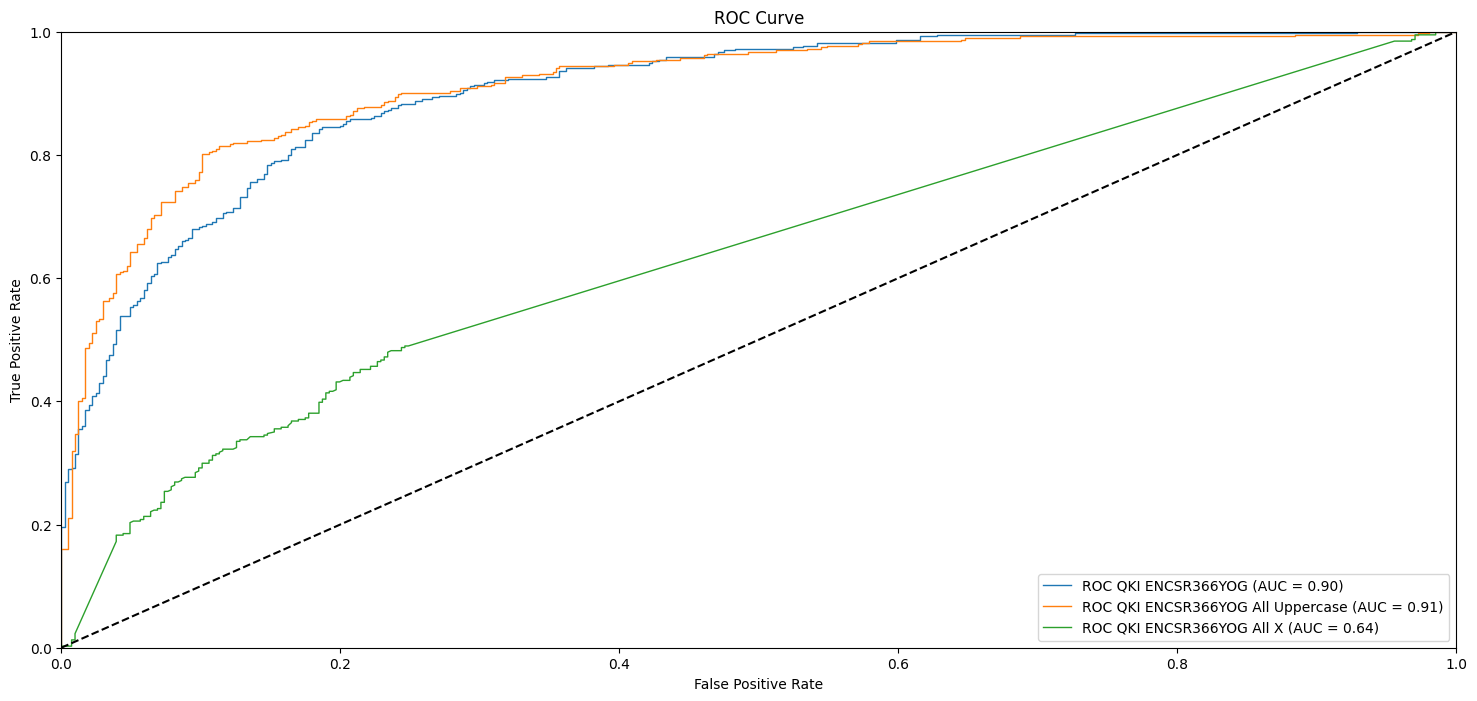

In [38]:
fig, ax = plt.subplots(figsize=(18, 8))

viz = RocCurveDisplay.from_estimator(
    QKI_ENCSR366YOG_model,
    QKI_ENCSR366YOG_test_features,
    QKI_ENCSR366YOG_test_labels,
    name=f"ROC QKI ENCSR366YOG",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    QKI_ENCSR366YOG_model_all_upper,
    QKI_ENCSR366YOG_test_features_all_upper,
    QKI_ENCSR366YOG_test_labels_all_upper,
    name=f"ROC QKI ENCSR366YOG All Uppercase",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    QKI_ENCSR366YOG_model_all_x,
    QKI_ENCSR366YOG_test_features_all_x,
    QKI_ENCSR366YOG_test_labels_all_x,
    name=f"ROC QKI ENCSR366YOG All X",
    lw=1,
    ax=ax
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ROC Curve",
)

ax.legend(loc="lower right")
ax.plot(np.linspace(0,1,10), np.linspace(0,1,10), '--',color='black')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

## ENCSR570WLM

### Import Dataset and fit model

In [21]:
QKI_ENCSR570WLM_ds = import_dataset()
[QKI_ENCSR570WLM_train, QKI_ENCSR570WLM_test] = train_test_split(QKI_ENCSR570WLM_ds,train_size=0.8, random_state=103)

# One-Hot Encoding
QKI_ENCSR570WLM_train_features = pd.get_dummies(QKI_ENCSR570WLM_train.iloc[:, 0:200]).to_numpy()
QKI_ENCSR570WLM_train_labels = QKI_ENCSR570WLM_train['label'].to_numpy()

QKI_ENCSR570WLM_test_features = pd.get_dummies(QKI_ENCSR570WLM_test.iloc[:, 0:200]).to_numpy()
QKI_ENCSR570WLM_test_labels = QKI_ENCSR570WLM_test['label'].to_numpy()

# C=1e-3 worked best
QKI_ENCSR570WLM_model = svm.SVC(C=1e-3, kernel="linear")
QKI_ENCSR570WLM_model = QKI_ENCSR570WLM_model.fit(QKI_ENCSR570WLM_train_features, QKI_ENCSR570WLM_train_labels)

Saving QKI_ENCSR570WLM_dataset.txt to QKI_ENCSR570WLM_dataset (1).txt
User uploaded file "QKI_ENCSR570WLM_dataset (1).txt" with length 816000 bytes


In [22]:
QKI_ENCSR570WLM_ds_all_upper = import_dataset()
[QKI_ENCSR570WLM_train_all_upper, QKI_ENCSR570WLM_test_all_upper] = train_test_split(QKI_ENCSR570WLM_ds_all_upper,train_size=0.8, random_state=103)

# One-Hot Encoding
QKI_ENCSR570WLM_train_features_all_upper = pd.get_dummies(QKI_ENCSR570WLM_train_all_upper.iloc[:, 0:200]).to_numpy()
QKI_ENCSR570WLM_train_labels_all_upper = QKI_ENCSR570WLM_train_all_upper['label'].to_numpy()

QKI_ENCSR570WLM_test_features_all_upper = pd.get_dummies(QKI_ENCSR570WLM_test_all_upper.iloc[:, 0:200]).to_numpy()
QKI_ENCSR570WLM_test_labels_all_upper = QKI_ENCSR570WLM_test_all_upper['label'].to_numpy()

# C=1e-3 worked best
QKI_ENCSR570WLM_model_all_upper = svm.SVC(C=1e-3, kernel="linear")
QKI_ENCSR570WLM_model_all_upper = QKI_ENCSR570WLM_model_all_upper.fit(QKI_ENCSR570WLM_train_features_all_upper, QKI_ENCSR570WLM_train_labels_all_upper)

Saving QKI_ENCSR570WLM_dataset_all_uppercase.txt to QKI_ENCSR570WLM_dataset_all_uppercase.txt
User uploaded file "QKI_ENCSR570WLM_dataset_all_uppercase.txt" with length 816000 bytes


In [23]:
QKI_ENCSR570WLM_ds_all_x = import_dataset()
[QKI_ENCSR570WLM_train_all_x, QKI_ENCSR570WLM_test_all_x] = train_test_split(QKI_ENCSR570WLM_ds_all_x,train_size=0.8, random_state=103)

# One-Hot Encoding
QKI_ENCSR570WLM_train_features_all_x = pd.get_dummies(QKI_ENCSR570WLM_train_all_x.iloc[:, 0:200]).to_numpy()
QKI_ENCSR570WLM_train_labels_all_x = QKI_ENCSR570WLM_train_all_x['label'].to_numpy()

QKI_ENCSR570WLM_test_features_all_x = pd.get_dummies(QKI_ENCSR570WLM_test_all_x.iloc[:, 0:200]).to_numpy()
QKI_ENCSR570WLM_test_labels_all_x = QKI_ENCSR570WLM_test_all_x['label'].to_numpy()

# C=1e-3 worked best
QKI_ENCSR570WLM_model_all_x = svm.SVC(C=1e-3, kernel="linear")
QKI_ENCSR570WLM_model_all_x = QKI_ENCSR570WLM_model_all_x.fit(QKI_ENCSR570WLM_train_features_all_x, QKI_ENCSR570WLM_train_labels_all_x)

Saving QKI_ENCSR570WLM_dataset_classify_uppercase_lowercase.txt to QKI_ENCSR570WLM_dataset_classify_uppercase_lowercase.txt
User uploaded file "QKI_ENCSR570WLM_dataset_classify_uppercase_lowercase.txt" with length 816000 bytes


### Display results

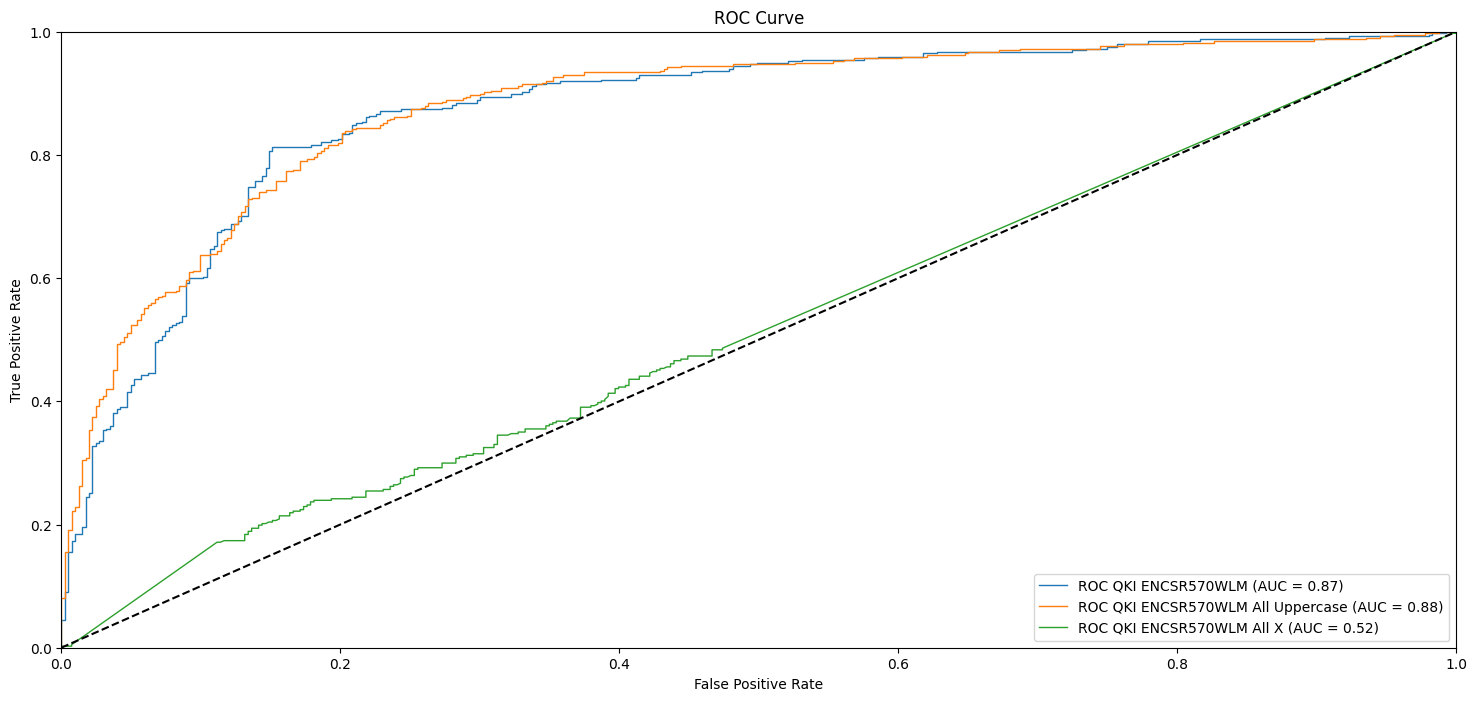

In [39]:
fig, ax = plt.subplots(figsize=(18, 8))

viz = RocCurveDisplay.from_estimator(
    QKI_ENCSR570WLM_model,
    QKI_ENCSR570WLM_test_features,
    QKI_ENCSR570WLM_test_labels,
    name=f"ROC QKI ENCSR570WLM",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    QKI_ENCSR570WLM_model_all_upper,
    QKI_ENCSR570WLM_test_features_all_upper,
    QKI_ENCSR570WLM_test_labels_all_upper,
    name=f"ROC QKI ENCSR570WLM All Uppercase",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    QKI_ENCSR570WLM_model_all_x,
    QKI_ENCSR570WLM_test_features_all_x,
    QKI_ENCSR570WLM_test_labels_all_x,
    name=f"ROC QKI ENCSR570WLM All X",
    lw=1,
    ax=ax
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ROC Curve",
)

ax.legend(loc="lower right")
ax.plot(np.linspace(0,1,10), np.linspace(0,1,10), '--',color='black')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

# RBM5

## ENCSR489ABS

### Import Dataset and fit model

In [24]:
RBM5_ENCSR489ABS_ds = import_dataset()
[RBM5_ENCSR489ABS_train, RBM5_ENCSR489ABS_test] = train_test_split(RBM5_ENCSR489ABS_ds,train_size=0.8, random_state=103)

# One-Hot Encoding
RBM5_ENCSR489ABS_train_features = pd.get_dummies(RBM5_ENCSR489ABS_train.iloc[:, 0:200]).to_numpy()
RBM5_ENCSR489ABS_train_labels = RBM5_ENCSR489ABS_train['label'].to_numpy()

RBM5_ENCSR489ABS_test_features = pd.get_dummies(RBM5_ENCSR489ABS_test.iloc[:, 0:200]).to_numpy()
RBM5_ENCSR489ABS_test_labels = RBM5_ENCSR489ABS_test['label'].to_numpy()

# C=1e-3 worked best
RBM5_ENCSR489ABS_model = svm.SVC(C=1e-3, kernel="linear")
RBM5_ENCSR489ABS_model = RBM5_ENCSR489ABS_model.fit(RBM5_ENCSR489ABS_train_features, RBM5_ENCSR489ABS_train_labels)

Saving RBM5_ENCSR489ABS_dataset.txt to RBM5_ENCSR489ABS_dataset.txt
User uploaded file "RBM5_ENCSR489ABS_dataset.txt" with length 261528 bytes


In [25]:
RBM5_ENCSR489ABS_ds_all_upper = import_dataset()
[RBM5_ENCSR489ABS_train_all_upper, RBM5_ENCSR489ABS_test_all_upper] = train_test_split(RBM5_ENCSR489ABS_ds_all_upper,train_size=0.8, random_state=103)

# One-Hot Encoding
RBM5_ENCSR489ABS_train_features_all_upper = pd.get_dummies(RBM5_ENCSR489ABS_train_all_upper.iloc[:, 0:200]).to_numpy()
RBM5_ENCSR489ABS_train_labels_all_upper = RBM5_ENCSR489ABS_train_all_upper['label'].to_numpy()

RBM5_ENCSR489ABS_test_features_all_upper = pd.get_dummies(RBM5_ENCSR489ABS_test_all_upper.iloc[:, 0:200]).to_numpy()
RBM5_ENCSR489ABS_test_labels_all_upper = RBM5_ENCSR489ABS_test_all_upper['label'].to_numpy()

# C=1e-3 worked best
RBM5_ENCSR489ABS_model_all_upper = svm.SVC(C=1e-3, kernel="linear")
RBM5_ENCSR489ABS_model_all_upper = RBM5_ENCSR489ABS_model_all_upper.fit(RBM5_ENCSR489ABS_train_features_all_upper, RBM5_ENCSR489ABS_train_labels_all_upper)

Saving RBM5_ENCSR489ABS_dataset_all_uppercase.txt to RBM5_ENCSR489ABS_dataset_all_uppercase.txt
User uploaded file "RBM5_ENCSR489ABS_dataset_all_uppercase.txt" with length 261528 bytes


In [27]:
RBM5_ENCSR489ABS_ds_all_x = import_dataset()
[RBM5_ENCSR489ABS_train_all_x, RBM5_ENCSR489ABS_test_all_x] = train_test_split(RBM5_ENCSR489ABS_ds_all_x,train_size=0.8, random_state=103)

# One-Hot Encoding
RBM5_ENCSR489ABS_train_features_all_x = pd.get_dummies(RBM5_ENCSR489ABS_train_all_x.iloc[:, 0:200]).to_numpy()
RBM5_ENCSR489ABS_train_labels_all_x = RBM5_ENCSR489ABS_train_all_x['label'].to_numpy()

RBM5_ENCSR489ABS_test_features_all_x = pd.get_dummies(RBM5_ENCSR489ABS_test_all_x.iloc[:, 0:200]).to_numpy()
RBM5_ENCSR489ABS_test_labels_all_x = RBM5_ENCSR489ABS_test_all_x['label'].to_numpy()

# C=1e-3 worked best
RBM5_ENCSR489ABS_model_all_x = svm.SVC(C=1e-3, kernel="linear")
RBM5_ENCSR489ABS_model_all_x = RBM5_ENCSR489ABS_model_all_x.fit(RBM5_ENCSR489ABS_train_features_all_x, RBM5_ENCSR489ABS_train_labels_all_x)

Saving RBM5_ENCSR489ABS_dataset_classify_uppercase_lowercase.txt to RBM5_ENCSR489ABS_dataset_classify_uppercase_lowercase.txt
User uploaded file "RBM5_ENCSR489ABS_dataset_classify_uppercase_lowercase.txt" with length 261528 bytes


### Display results

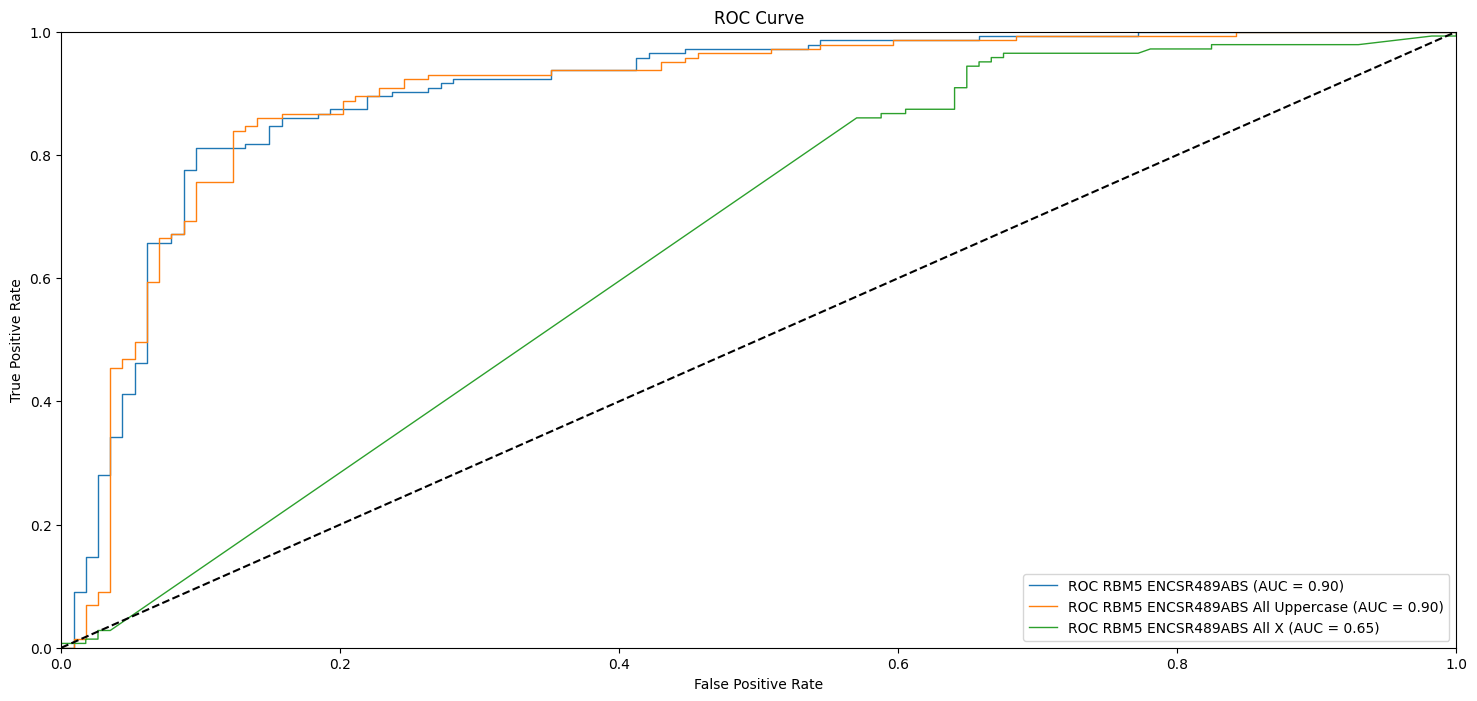

In [40]:
fig, ax = plt.subplots(figsize=(18, 8))

viz = RocCurveDisplay.from_estimator(
    RBM5_ENCSR489ABS_model,
    RBM5_ENCSR489ABS_test_features,
    RBM5_ENCSR489ABS_test_labels,
    name=f"ROC RBM5 ENCSR489ABS",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    RBM5_ENCSR489ABS_model_all_upper,
    RBM5_ENCSR489ABS_test_features_all_upper,
    RBM5_ENCSR489ABS_test_labels_all_upper,
    name=f"ROC RBM5 ENCSR489ABS All Uppercase",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    RBM5_ENCSR489ABS_model_all_x,
    RBM5_ENCSR489ABS_test_features_all_x,
    RBM5_ENCSR489ABS_test_labels_all_x,
    name=f"ROC RBM5 ENCSR489ABS All X",
    lw=1,
    ax=ax
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ROC Curve",
)

ax.legend(loc="lower right")
ax.plot(np.linspace(0,1,10), np.linspace(0,1,10), '--',color='black')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

# hnRNPL

## ENCSR724RDN

### Import Dataset and fit model

In [33]:
hnRNPL_ENCSR724RDN_ds = import_dataset()
[hnRNPL_ENCSR724RDN_train, hnRNPL_ENCSR724RDN_test] = train_test_split(hnRNPL_ENCSR724RDN_ds,train_size=0.8, random_state=103)

# One-Hot Encoding
hnRNPL_ENCSR724RDN_train_features = pd.get_dummies(hnRNPL_ENCSR724RDN_train.iloc[:, 0:200]).to_numpy()
hnRNPL_ENCSR724RDN_train_labels = hnRNPL_ENCSR724RDN_train['label'].to_numpy()

hnRNPL_ENCSR724RDN_test_features = pd.get_dummies(hnRNPL_ENCSR724RDN_test.iloc[:, 0:200]).to_numpy()
hnRNPL_ENCSR724RDN_test_labels = hnRNPL_ENCSR724RDN_test['label'].to_numpy()

# C=1e-3 worked best
hnRNPL_ENCSR724RDN_model = svm.SVC(C=1e-3, kernel="linear")
hnRNPL_ENCSR724RDN_model = hnRNPL_ENCSR724RDN_model.fit(hnRNPL_ENCSR724RDN_train_features, hnRNPL_ENCSR724RDN_train_labels)

Saving hnRNPL_ENCSR724RDN_dataset.txt to hnRNPL_ENCSR724RDN_dataset.txt
User uploaded file "hnRNPL_ENCSR724RDN_dataset.txt" with length 816000 bytes


In [34]:
hnRNPL_ENCSR724RDN_ds_all_upper = import_dataset()
[hnRNPL_ENCSR724RDN_train_all_upper, hnRNPL_ENCSR724RDN_test_all_upper] = train_test_split(hnRNPL_ENCSR724RDN_ds_all_upper,train_size=0.8, random_state=103)

# One-Hot Encoding
hnRNPL_ENCSR724RDN_train_features_all_upper = pd.get_dummies(hnRNPL_ENCSR724RDN_train_all_upper.iloc[:, 0:200]).to_numpy()
hnRNPL_ENCSR724RDN_train_labels_all_upper =hnRNPL_ENCSR724RDN_train_all_upper['label'].to_numpy()

hnRNPL_ENCSR724RDN_test_features_all_upper = pd.get_dummies(hnRNPL_ENCSR724RDN_test_all_upper.iloc[:, 0:200]).to_numpy()
hnRNPL_ENCSR724RDN_test_labels_all_upper = hnRNPL_ENCSR724RDN_test_all_upper['label'].to_numpy()

# C=1e-3 worked best
hnRNPL_ENCSR724RDN_model_all_upper = svm.SVC(C=1e-3, kernel="linear")
hnRNPL_ENCSR724RDN_model_all_upper = hnRNPL_ENCSR724RDN_model_all_upper.fit(hnRNPL_ENCSR724RDN_train_features_all_upper, hnRNPL_ENCSR724RDN_train_labels_all_upper)

Saving hnRNPL_ENCSR724RDN_dataset_all_uppercase.txt to hnRNPL_ENCSR724RDN_dataset_all_uppercase.txt
User uploaded file "hnRNPL_ENCSR724RDN_dataset_all_uppercase.txt" with length 816000 bytes


In [35]:
hnRNPL_ENCSR724RDN_ds_all_x = import_dataset()
[hnRNPL_ENCSR724RDN_train_all_x, hnRNPL_ENCSR724RDN_test_all_x] = train_test_split(hnRNPL_ENCSR724RDN_ds_all_x,train_size=0.8, random_state=103)

# One-Hot Encoding
hnRNPL_ENCSR724RDN_train_features_all_x = pd.get_dummies(hnRNPL_ENCSR724RDN_train_all_x.iloc[:, 0:200]).to_numpy()
hnRNPL_ENCSR724RDN_train_labels_all_x = hnRNPL_ENCSR724RDN_train_all_x['label'].to_numpy()

hnRNPL_ENCSR724RDN_test_features_all_x = pd.get_dummies(hnRNPL_ENCSR724RDN_test_all_x.iloc[:, 0:200]).to_numpy()
hnRNPL_ENCSR724RDN_test_labels_all_x = hnRNPL_ENCSR724RDN_test_all_x['label'].to_numpy()

# C=1e-3 worked best
hnRNPL_ENCSR724RDN_model_all_x = svm.SVC(C=1e-3, kernel="linear")
hnRNPL_ENCSR724RDN_model_all_x = hnRNPL_ENCSR724RDN_model_all_x.fit(hnRNPL_ENCSR724RDN_train_features_all_x, hnRNPL_ENCSR724RDN_train_labels_all_x)

Saving hnRNPL_ENCSR724RDN_dataset_classify_uppercase_lowercase.txt to hnRNPL_ENCSR724RDN_dataset_classify_uppercase_lowercase.txt
User uploaded file "hnRNPL_ENCSR724RDN_dataset_classify_uppercase_lowercase.txt" with length 816000 bytes


### Display results

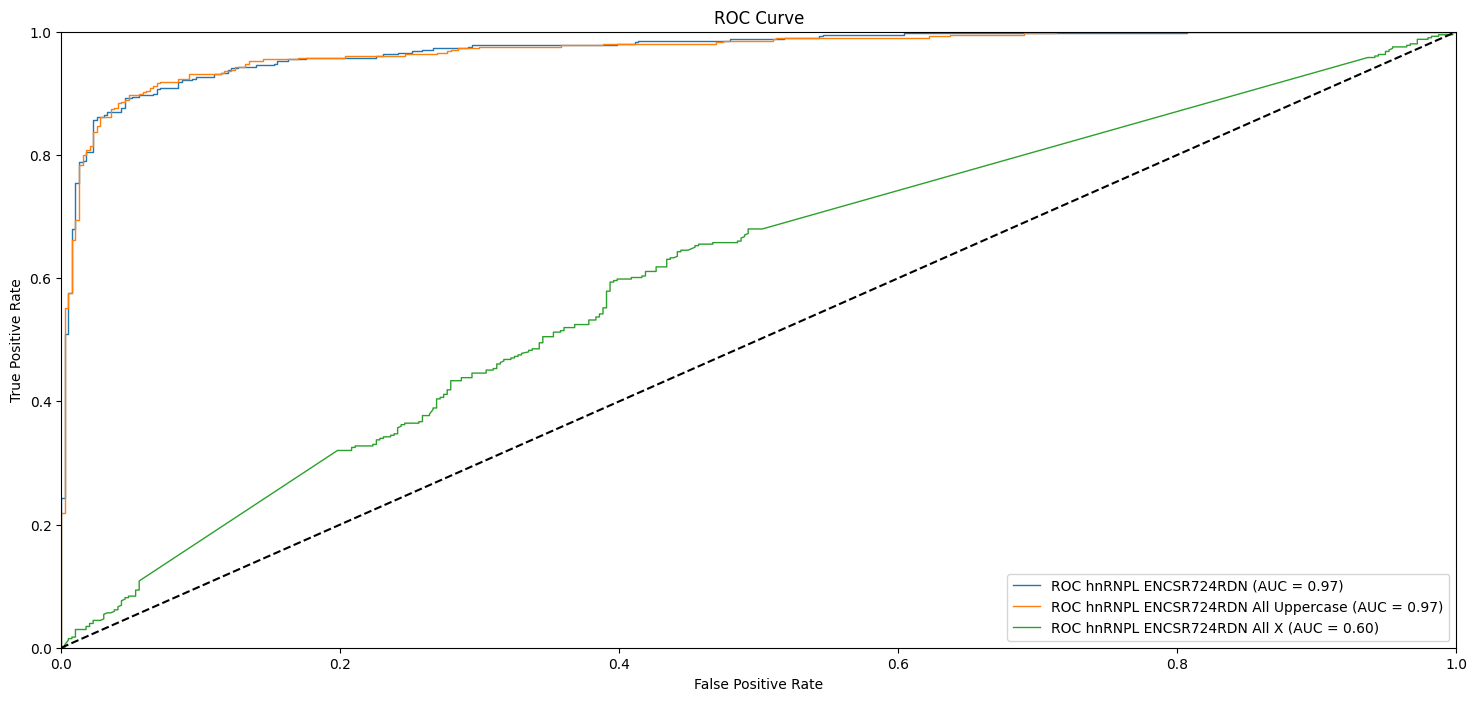

In [42]:
fig, ax = plt.subplots(figsize=(18, 8))

viz = RocCurveDisplay.from_estimator(
    hnRNPL_ENCSR724RDN_model,
    hnRNPL_ENCSR724RDN_test_features,
    hnRNPL_ENCSR724RDN_test_labels,
    name=f"ROC hnRNPL ENCSR724RDN",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    hnRNPL_ENCSR724RDN_model_all_upper,
    hnRNPL_ENCSR724RDN_test_features_all_upper,
    hnRNPL_ENCSR724RDN_test_labels_all_upper,
    name=f"ROC hnRNPL ENCSR724RDN All Uppercase",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    hnRNPL_ENCSR724RDN_model_all_x,
    hnRNPL_ENCSR724RDN_test_features_all_x,
    hnRNPL_ENCSR724RDN_test_labels_all_x,
    name=f"ROC hnRNPL ENCSR724RDN All X",
    lw=1,
    ax=ax
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ROC Curve",
)

ax.legend(loc="lower right")
ax.plot(np.linspace(0,1,10), np.linspace(0,1,10), '--',color='black')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

## ENCSR795CAI

### Import Dataset and fit model

In [28]:
hnRNPL_ENCSR795CAI_ds = import_dataset()
[hnRNPL_ENCSR795CAI_train, hnRNPL_ENCSR795CAI_test] = train_test_split(hnRNPL_ENCSR795CAI_ds,train_size=0.8, random_state=103)

# One-Hot Encoding
hnRNPL_ENCSR795CAI_train_features = pd.get_dummies(hnRNPL_ENCSR795CAI_train.iloc[:, 0:200]).to_numpy()
hnRNPL_ENCSR795CAI_train_labels = hnRNPL_ENCSR795CAI_train['label'].to_numpy()

hnRNPL_ENCSR795CAI_test_features = pd.get_dummies(hnRNPL_ENCSR795CAI_test.iloc[:, 0:200]).to_numpy()
hnRNPL_ENCSR795CAI_test_labels = hnRNPL_ENCSR795CAI_test['label'].to_numpy()

# C=1e-3 worked best
hnRNPL_ENCSR795CAI_model = svm.SVC(C=1e-3, kernel="linear")
hnRNPL_ENCSR795CAI_model = hnRNPL_ENCSR795CAI_model.fit(hnRNPL_ENCSR795CAI_train_features, hnRNPL_ENCSR795CAI_train_labels)

Saving hnRNPL_ENCSR795CAI_dataset.txt to hnRNPL_ENCSR795CAI_dataset.txt
User uploaded file "hnRNPL_ENCSR795CAI_dataset.txt" with length 816000 bytes


In [29]:
hnRNPL_ENCSR795CAI_ds_all_upper = import_dataset()
[hnRNPL_ENCSR795CAI_train_all_upper, hnRNPL_ENCSR795CAI_test_all_upper] = train_test_split(hnRNPL_ENCSR795CAI_ds_all_upper,train_size=0.8, random_state=103)

# One-Hot Encoding
hnRNPL_ENCSR795CAI_train_features_all_upper = pd.get_dummies(hnRNPL_ENCSR795CAI_train_all_upper.iloc[:, 0:200]).to_numpy()
hnRNPL_ENCSR795CAI_train_labels_all_upper =hnRNPL_ENCSR795CAI_train_all_upper['label'].to_numpy()

hnRNPL_ENCSR795CAI_test_features_all_upper = pd.get_dummies(hnRNPL_ENCSR795CAI_test_all_upper.iloc[:, 0:200]).to_numpy()
hnRNPL_ENCSR795CAI_test_labels_all_upper = hnRNPL_ENCSR795CAI_test_all_upper['label'].to_numpy()

# C=1e-3 worked best
hnRNPL_ENCSR795CAI_model_all_upper = svm.SVC(C=1e-3, kernel="linear")
hnRNPL_ENCSR795CAI_model_all_upper = hnRNPL_ENCSR795CAI_model_all_upper.fit(hnRNPL_ENCSR795CAI_train_features_all_upper, hnRNPL_ENCSR795CAI_train_labels_all_upper)

Saving hnRNPL_ENCSR795CAI_dataset_all_uppercase.txt to hnRNPL_ENCSR795CAI_dataset_all_uppercase.txt
User uploaded file "hnRNPL_ENCSR795CAI_dataset_all_uppercase.txt" with length 816000 bytes


In [32]:
hnRNPL_ENCSR795CAI_ds_all_x = import_dataset()
[hnRNPL_ENCSR795CAI_train_all_x, hnRNPL_ENCSR795CAI_test_all_x] = train_test_split(hnRNPL_ENCSR489ABS_ds_all_x,train_size=0.8, random_state=103)

# One-Hot Encoding
hnRNPL_ENCSR795CAI_train_features_all_x = pd.get_dummies(hnRNPL_ENCSR795CAI_train_all_x.iloc[:, 0:200]).to_numpy()
hnRNPL_ENCSR795CAI_train_labels_all_x = hnRNPL_ENCSR795CAI_train_all_x['label'].to_numpy()

hnRNPL_ENCSR795CAI_test_features_all_x = pd.get_dummies(hnRNPL_ENCSR795CAI_test_all_x.iloc[:, 0:200]).to_numpy()
hnRNPL_ENCSR795CAI_test_labels_all_x = hnRNPL_ENCSR795CAI_test_all_x['label'].to_numpy()

# C=1e-3 worked best
hnRNPL_ENCSR795CAI_model_all_x = svm.SVC(C=1e-3, kernel="linear")
hnRNPL_ENCSR795CAI_model_all_x = hnRNPL_ENCSR795CAI_model_all_x.fit(hnRNPL_ENCSR795CAI_train_features_all_x, hnRNPL_ENCSR795CAI_train_labels_all_x)

Saving hnRNPL_ENCSR795CAI_dataset_classify_uppercase_lowercase.txt to hnRNPL_ENCSR795CAI_dataset_classify_uppercase_lowercase (2).txt
User uploaded file "hnRNPL_ENCSR795CAI_dataset_classify_uppercase_lowercase (2).txt" with length 816000 bytes


### Display results

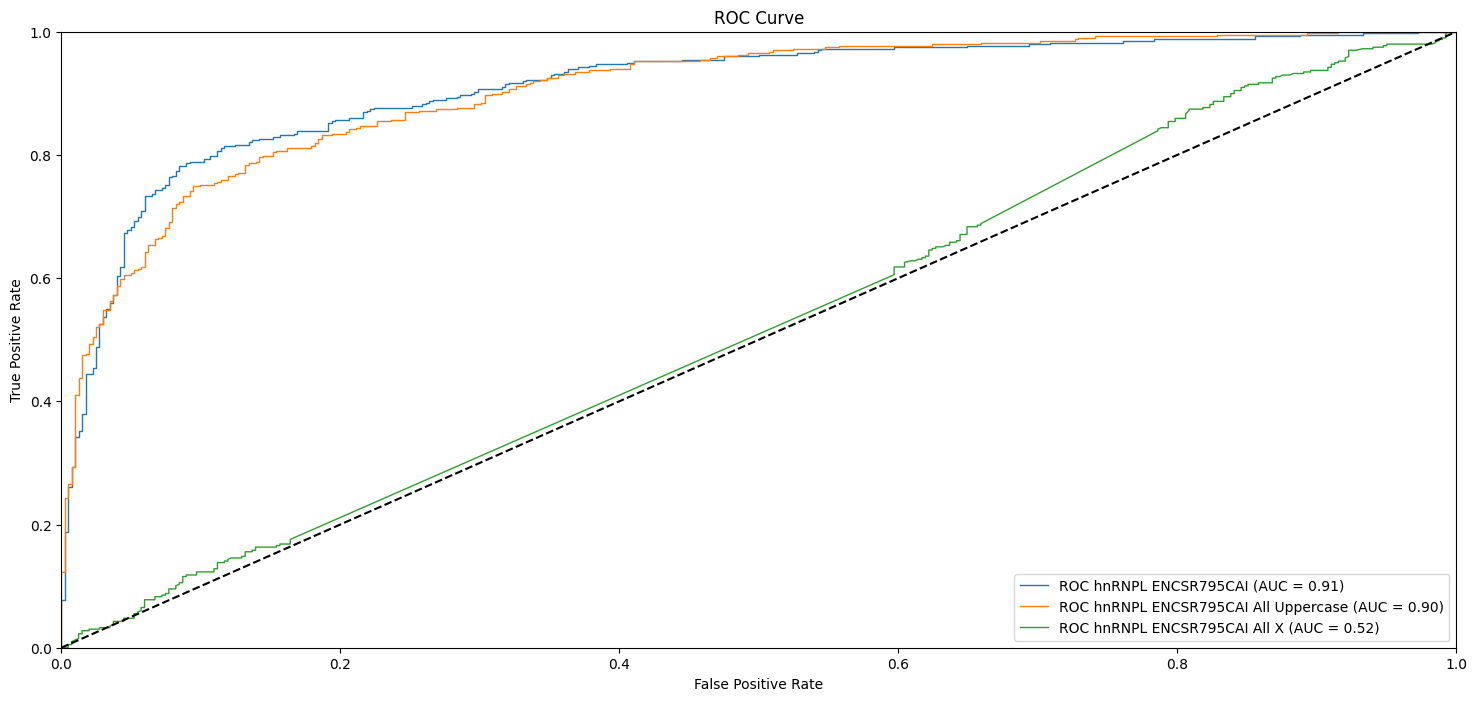

In [41]:
fig, ax = plt.subplots(figsize=(18, 8))

viz = RocCurveDisplay.from_estimator(
    hnRNPL_ENCSR795CAI_model,
    hnRNPL_ENCSR795CAI_test_features,
    hnRNPL_ENCSR795CAI_test_labels,
    name=f"ROC hnRNPL ENCSR795CAI",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    hnRNPL_ENCSR795CAI_model_all_upper,
    hnRNPL_ENCSR795CAI_test_features_all_upper,
    hnRNPL_ENCSR795CAI_test_labels_all_upper,
    name=f"ROC hnRNPL ENCSR795CAI All Uppercase",
    lw=1,
    ax=ax
)

viz = RocCurveDisplay.from_estimator(
    hnRNPL_ENCSR795CAI_model_all_x,
    hnRNPL_ENCSR795CAI_test_features_all_x,
    hnRNPL_ENCSR795CAI_test_labels_all_x,
    name=f"ROC hnRNPL ENCSR795CAI All X",
    lw=1,
    ax=ax
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"ROC Curve",
)

ax.legend(loc="lower right")
ax.plot(np.linspace(0,1,10), np.linspace(0,1,10), '--',color='black')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()